# Exploratory Data Analysis

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
# import seaborn as sns
import numpy as np

## Load in data

In [12]:
df_sales = pd.read_csv('D:\codes\customer_sales\data\sales_data.csv')
df_sales.head()

,invoice_no,customer_id,category,quantity,price,invoice_date,shopping_mall
0,I138884,C241288,Clothing,5,1500.40,05-08-2022,Kanyon
1,I317333,C111565,Shoes,3,1800.51,12-12-2021,Forum Istanbul
2,I127801,C266599,Clothing,1,300.08,09-11-2021,Metrocity
3,I173702,C988172,Shoes,5,3000.85,16-05-2021,Metropol AVM
4,I337046,C189076,Books,4,60.60,24-10-2021,Kanyon


In [15]:
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   invoice_no     99457 non-null  object 
 1   customer_id    99457 non-null  object 
 2   category       99457 non-null  object 
 3   quantity       99457 non-null  int64  
 4   price          99457 non-null  float64
 5   invoice_date   99457 non-null  object 
 6   shopping_mall  99457 non-null  object 
dtypes: float64(1), int64(1), object(5)
memory usage: 5.3+ MB


In [16]:
df_sales['invoice_date'] = df_sales['invoice_date'].convert_dtypes('datetime') 

In [18]:
df_sales = df_sales.sort_values('invoice_date')

In [19]:
df_sales

,invoice_no,customer_id,category,quantity,price,invoice_date,shopping_mall
6479,I312021,C153822,Cosmetics,3,121.98,01-01-2021,Metrocity
69999,I262389,C193687,Toys,4,143.36,01-01-2021,Istinye Park
70063,I114774,C913265,Souvenir,1,11.73,01-01-2021,Metropol AVM
84159,I148566,C107467,Cosmetics,5,203.30,01-01-2021,Mall of Istanbul
70354,I310843,C326151,Clothing,3,900.24,01-01-2021,Metrocity
...,...,...,...,...,...,...,...
76490,I229424,C307992,Food & Beverage,4,20.92,31-12-2022,Cevahir AVM
54597,I990637,C223635,Clothing,5,1500.40,31-12-2022,Istinye Park
89821,I244340,C269126,Cosmetics,5,203.30,31-12-2022,Emaar Square Mall
75157,I138726,C323953,Technology,3,3150.00,31-12-2022,Mall of Istanbul


## Grab a random subset from the data to do analysis on

In [21]:
df_moi = df_sales[
    df_sales.shopping_mall == 'Mall of Istanbul'
]
df_moi.head()

,invoice_no,customer_id,category,quantity,price,invoice_date,shopping_mall
84159,I148566,C107467,Cosmetics,5,203.30,01-01-2021,Mall of Istanbul
36955,I966320,C169558,Clothing,3,900.24,01-01-2021,Mall of Istanbul
83726,I938875,C107835,Shoes,3,1800.51,01-01-2021,Mall of Istanbul
60659,I200375,C255333,Toys,2,71.68,01-01-2021,Mall of Istanbul
57034,I211789,C106566,Clothing,3,900.24,01-01-2021,Mall of Istanbul


In [22]:
df_moi.category.value_counts()

category
Clothing           6923
Cosmetics          3050
Food & Beverage    2957
Shoes              2023
Toys               2000
Books              1025
Technology         1017
Souvenir            948
Name: count, dtype: int64

In [23]:
df_moi_clothing = df_moi[
    df_moi.category == 'Clothing'
]
df_moi_clothing.head()

,invoice_no,customer_id,category,quantity,price,invoice_date,shopping_mall
36955,I966320,C169558,Clothing,3,900.24,01-01-2021,Mall of Istanbul
57034,I211789,C106566,Clothing,3,900.24,01-01-2021,Mall of Istanbul
28243,I234608,C885701,Clothing,4,1200.32,01-01-2021,Mall of Istanbul
20822,I193645,C263155,Clothing,4,1200.32,01-01-2021,Mall of Istanbul
80074,I310590,C612294,Clothing,1,300.08,01-01-2021,Mall of Istanbul


<Axes: xlabel='invoice_date'>

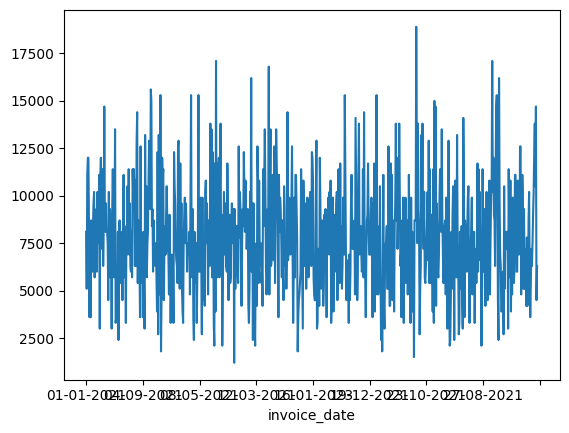

In [28]:
df = df_moi_clothing.groupby('invoice_date')['price'].sum()
df.plot(kind='line')

From the plot, we can make a hypothesis that total sales for the clothing sales in mall of istanbul is stationary.
# TODO:
- Check for **stationarity**.
    - This can be done by using the adf test, the $h_0$ states that the time series is non-stationary.

In [31]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(df)
print(f'''ADF statistic: {result[0]}
p-value: {result[1]}
      
      ''')

ADF statistic: -27.198915672909408
p-value: 0.0
      
      


A large negative number, and a p-value below 0.05. 

This means that the timeseries is indeed stationary.